## Regression Analysis : First Machine Learning Algorithm !!

### Machine learning 
- is an application of artificial intelligence (AI) that provides systems the __ability to automatically learn and improve from experience without being explicitly programmed__.

<img style="float: left;" src = "./img/ml_definition.png" width="600" height="600">

<img style="float: left;" src = "./img/traditionalVsml.png" width="600" height="600">

### Types of Machine Learning

<img style="float: left;" src = "./img/types-ml.png" width="700" height="600">

<br>
<br>

<img style="float: left;" src = "./img/ml-ex.png" width="800" height="700">

__Why use linear regression?__

1. Easy to use
2. Easy to interpret
3. Basis for many methods
4. Runs fast
5. Most people have heard about it :-) 

### Libraries in Python for Linear Regression

The two most popular ones are

1. `scikit-learn`
2. `statsmodels`

Highly recommend learning `scikit-learn` since that's also the machine learning package in Python.

### Linear regression 

Let's use `scikit-lean` for this example. 

Linear regression is of the form:

$y = \beta_0 + \beta_1x_1 + \beta_2x_2 + ... + \beta_nx_n$

- $y$ is what we have to predict/independent variable/response variable
- $\beta_0$ is the intercept/slope
- $\beta_1$ is the coefficient for $x_1$ (the first feature/dependent variable)
- $\beta_n$ is the coefficient for $x_n$ (the nth feature/dependent variable)

The $\beta$ are called *model coefficients*

The model coefficients are estimated in this process. (In Machine Learning parlance - the weights are learned using the algorithm). The objective function is least squares method. 
<br>

**Least Squares Method** : To identify the weights so that the overall solution minimizes the sum of the squares of the errors made in the results of every single equation. [Wiki](https://en.wikipedia.org/wiki/Least_squares)

<img style="float: left;" src = "./img/lin_reg.jpg" width="600" height="600">

<h2> Model Building & Testing Methodology </h2>
<img src="./img/train_test.png" alt="Train & Test Methodology" width="700" height="600">
<br>
<br>
<br>

### Must read blog:
Interpretable Machine Learning by Christoph
https://christophm.github.io/interpretable-ml-book/intro.html

In [1]:
# Step1: Import packages
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import seaborn as sns
sns.set(color_codes = True)
%matplotlib inline

In [2]:
# Step2:  Load our data
df = pd.read_csv('./data/Mall_Customers.csv')
df.rename(columns={'CustomerID':'id','Spending Score (1-100)':'score','Annual Income (k$)':'income'},inplace=True)
df.head() # Visualize first 5 rows of data
df.tail()

,id,Gender,Age,income,score
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18
199,200,Male,30,137,83


In [3]:
# Step3: Feature Engineering - transforming variables as appropriate for inputs to Machine Learning Algorithm
# transforming categorical variable Gender using One hot encodding
gender_onhot = pd.get_dummies(df['Gender'])
gender_onhot.tail()

,Female,Male
195,1,0
196,1,0
197,0,1
198,0,1
199,0,1


In [4]:
# Create input dataset aka X
X = pd.merge(df[['Age','income']], gender_onhot, left_index=True, right_index=True)
X.head()

,Age,income,Female,Male
0,19,15,0,1
1,21,15,0,1
2,20,16,1,0
3,23,16,1,0
4,31,17,1,0


Correlation between variables.........


,Age,income,Female,Male
Age,1.000000,-0.012398,-0.060867,0.060867
income,-0.012398,1.000000,-0.056410,0.056410
Female,-0.060867,-0.056410,1.000000,-1.000000
Male,0.060867,0.056410,-1.000000,1.000000


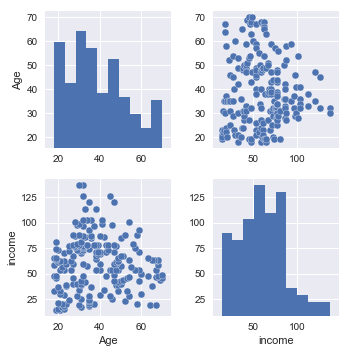

In [5]:
sns.pairplot(X[['Age','income']])
print("Correlation between variables.........")
X.iloc[:,:4].corr()

In [6]:
# Create target variable
Y = df['score']
Y.head()

0    39
1    81
2     6
3    77
4    40
Name: score, dtype: int64

In [7]:
# Step3: Split data in train & test set
X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size=0.20, random_state=42)
print('Shape of Training Xs:{}'.format(X_train.shape))
print('Shape of Test Xs:{}'.format(X_test.shape))

Shape of Training Xs:(160, 4)
Shape of Test Xs:(40, 4)


In [8]:
# Step4: Build Linear Regression Analysis Model
learner = LinearRegression(); #initializing linear regression model

learner.fit(X_train,y_train); #training the linear regression model
y_predicted = learner.predict(X_test)
score=learner.score(X_test,y_test);#testing the linear regression model

### Interpretation

__Score__: R^2 (pronounced as R Square) it is also called as __coefficient of determination__ of prediction.

__Range of Score values__: 0 to 1 , 0 -> No relation between predicted Y and input Xs, 1 -> best case scenario where predicted value is same as actual value.
__Formula for Score__: R^2 = (1 - u/v), where u is the residual sum of squares ((y_true - y_pred) ** 2).sum() and v is the total sum of squares ((y_true - y_true.mean()) ** 2).sum()

In [9]:
print(score)
print(y_predicted)

0.025478181600746108
[59.82812944 58.84945709 37.0469889  54.91842692 39.84329514 64.23552817
 55.67685009 51.87565203 46.07289703 59.89547225 49.20969012 48.94060312
 55.3180862  61.29134074 45.59726863 59.57252226 44.29084909 50.23765619
 34.22423523 62.12139172 62.15314859 52.45877845 56.11689254 51.61981691
 62.70931536 32.02956041 62.46718801 34.51159927 57.44975951 61.0850273
 55.29067064 41.37333704 45.39021502 58.32910423 49.62711422 45.23776457
 58.78719575 55.82495924 45.88868971 48.35702079]


In [10]:
# Step5: Check Accuracy of Model
df_new = pd.DataFrame({"true_score":y_test,"predicted_score":y_predicted})
df_new

,true_score,predicted_score
95,52,59.828129
15,79,58.849457
30,4,37.046989
158,1,54.918427
128,11,39.843295
115,50,64.235528
69,47,55.676850
170,13,51.875652
174,13,46.072897
45,65,59.895472


In [11]:
# Step6: Diagnostic analysis

from sklearn.metrics import mean_squared_error, r2_score
print("Intercept is at: %.2f"%(learner.intercept_))
# The coefficients
print('Coefficients: \n', learner.coef_)
# The mean squared error
print("Mean squared error: %.2f"
      % mean_squared_error(y_test, y_predicted))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.4f' % r2_score(y_test, y_predicted))

Intercept is at: 71.31
Coefficients: 
 [-0.58792363  0.05386299  0.59923281 -0.59923281]
Mean squared error: 480.67
Variance score: 0.0255
